In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import collections
import struct

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

from construct import *

In [2]:
TMPrimaryHeader = BitStruct(
    'transfer_frame_version_number' / BitsInteger(2),
    'spacecraft_id' / BitsInteger(10),
    'virtual_channel_id' / BitsInteger(3),
    'ocf_flag' / Flag,
    'master_channel_frame_count' / BitsInteger(8),
    'virtual_channel_frame_count' / BitsInteger(8),
    'secondary_header_flag' / Flag,
    'synch_flag' / Flag,
    'packet_order_flag' / Flag,
    'segment_length_id' / BitsInteger(2),
    'first_header_pointer' / BitsInteger(11)
)

CLCW = BitStruct(
    'control_word_type' / Flag,
    'clcw_version_number' / BitsInteger(2),
    'status_field' / BitsInteger(3),
    'cop_in_effect' / BitsInteger(2),
    'virtual_channel_identification' / BitsInteger(6),
    'rsvd_spare' / BitsInteger(2),
    'no_rf_avail' / Flag,
    'no_bit_lock' / Flag,
    'lock_out' / Flag,
    'wait' / Flag,
    'retransmit' / Flag,
    'farm_b_counter' / BitsInteger(2),
    'rsvd_spare2' / BitsInteger(1),
    'report_value' / BitsInteger(8)
)

TMFrame = Struct(
    'primary_header' / TMPrimaryHeader,
    'm_pdu_packet_zone' / Bytes(211),
    'clcw' / CLCW,
)

In [3]:
frame_size = 223 - 2
frames = np.fromfile('aditya_frames.u8', dtype='uint8').reshape(-1, frame_size)
frames.shape

(1230, 221)

In [4]:
tm = [TMFrame.parse(f) for f in frames]
scid = [a.primary_header.spacecraft_id for a in tm]
vcid = np.array([a.primary_header.virtual_channel_id for a in tm])
mcfc = np.array([a.primary_header.master_channel_frame_count for a in tm])
vcfc = np.array([a.primary_header.virtual_channel_frame_count for a in tm])
[a.primary_header for a in tm[:5]]

[Container(transfer_frame_version_number=0, spacecraft_id=414, virtual_channel_id=2, ocf_flag=True, master_channel_frame_count=153, virtual_channel_frame_count=153, secondary_header_flag=False, synch_flag=False, packet_order_flag=False, segment_length_id=3, first_header_pointer=0),
 Container(transfer_frame_version_number=0, spacecraft_id=414, virtual_channel_id=2, ocf_flag=True, master_channel_frame_count=154, virtual_channel_frame_count=154, secondary_header_flag=False, synch_flag=False, packet_order_flag=False, segment_length_id=3, first_header_pointer=0),
 Container(transfer_frame_version_number=0, spacecraft_id=414, virtual_channel_id=2, ocf_flag=True, master_channel_frame_count=155, virtual_channel_frame_count=155, secondary_header_flag=False, synch_flag=False, packet_order_flag=False, segment_length_id=3, first_header_pointer=0),
 Container(transfer_frame_version_number=0, spacecraft_id=414, virtual_channel_id=2, ocf_flag=True, master_channel_frame_count=156, virtual_channel_fra

In [5]:
collections.Counter(a.primary_header.transfer_frame_version_number for a in tm)

Counter({0: 1230})

In [6]:
collections.Counter(scid)

Counter({414: 1230})

In [7]:
hex(414)

'0x19e'

In [8]:
collections.Counter(vcid)

Counter({2: 1230})

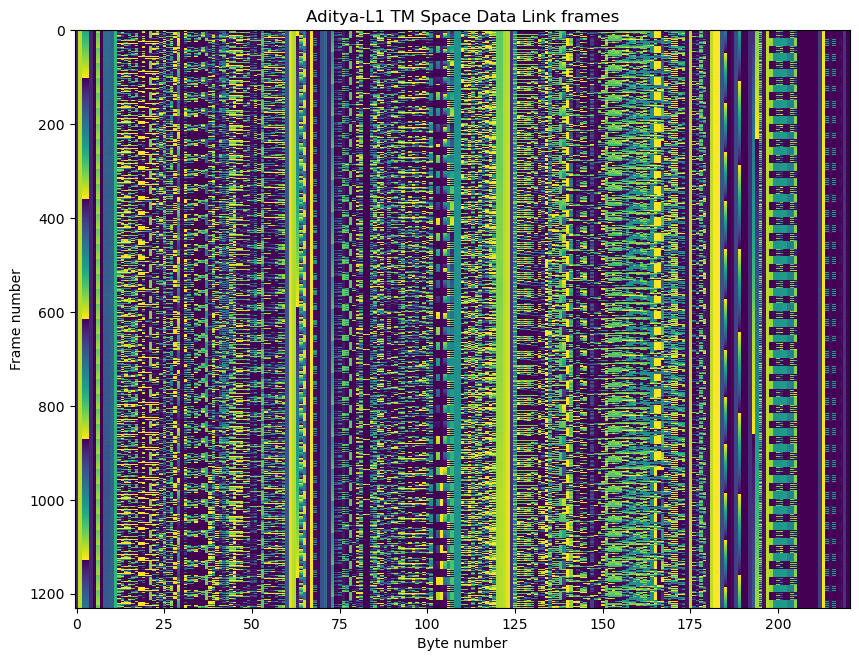

In [9]:
plt.figure(figsize=(10, 7.5))
plt.imshow(frames, aspect='auto', interpolation='none')
plt.title('Aditya-L1 TM Space Data Link frames')
plt.xlabel('Byte number')
plt.ylabel('Frame number');

In [10]:
clcw0 = [a.clcw for a in tm if a.primary_header.master_channel_frame_count % 2 == 0]
all([c == clcw0[0] for c in clcw0])

True

In [11]:
clcw0[0]

Container(control_word_type=False, clcw_version_number=0, status_field=0, cop_in_effect=1, virtual_channel_identification=1, rsvd_spare=0, no_rf_avail=False, no_bit_lock=False, lock_out=True, wait=False, retransmit=False, farm_b_counter=3, rsvd_spare2=0, report_value=0)

In [12]:
clcw1 = [a.clcw for a in tm if a.primary_header.master_channel_frame_count % 2 == 1]
all([c == clcw1[0] for c in clcw1])

True

In [13]:
clcw1[0]

Container(control_word_type=False, clcw_version_number=0, status_field=0, cop_in_effect=1, virtual_channel_identification=2, rsvd_spare=0, no_rf_avail=False, no_bit_lock=False, lock_out=True, wait=False, retransmit=False, farm_b_counter=2, rsvd_spare2=0, report_value=0)